In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from string import punctuation
from sklearn.feature_extraction import stop_words
stopwords = stop_words.ENGLISH_STOP_WORDS
import argparse


params = {'axes.labelsize': 10,
          'axes.titlesize': 10,
          'font.size': 14}
plt.rcParams.update(params)

In [74]:
df_raw = pd.read_csv('../data/mbti_1.csv')

In [75]:
df_raw.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [76]:
type_count = df_raw.groupby('type').count().sort_values(by='posts', ascending=False).reset_index()
type_count

,type,posts
0,INFP,1832
1,INFJ,1470
2,INTP,1304
3,INTJ,1091
4,ENTP,685
5,ENFP,675
6,ISTP,337
7,ISFP,271
8,ENTJ,231
9,ISTJ,205


In [9]:
type(hist_label)

list

In [10]:
print(hist_label)
print(hist_label[1][:1])
range(len(hist_label))

['INFP', 'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP', 'ISFP', 'ENTJ', 'ISTJ', 'ENFJ', 'ISFJ', 'ESTP', 'ESFP', 'ESFJ', 'ESTJ']
I


range(0, 16)

In [77]:

color_by_ei

NameError: name 'color_by_ei' is not defined

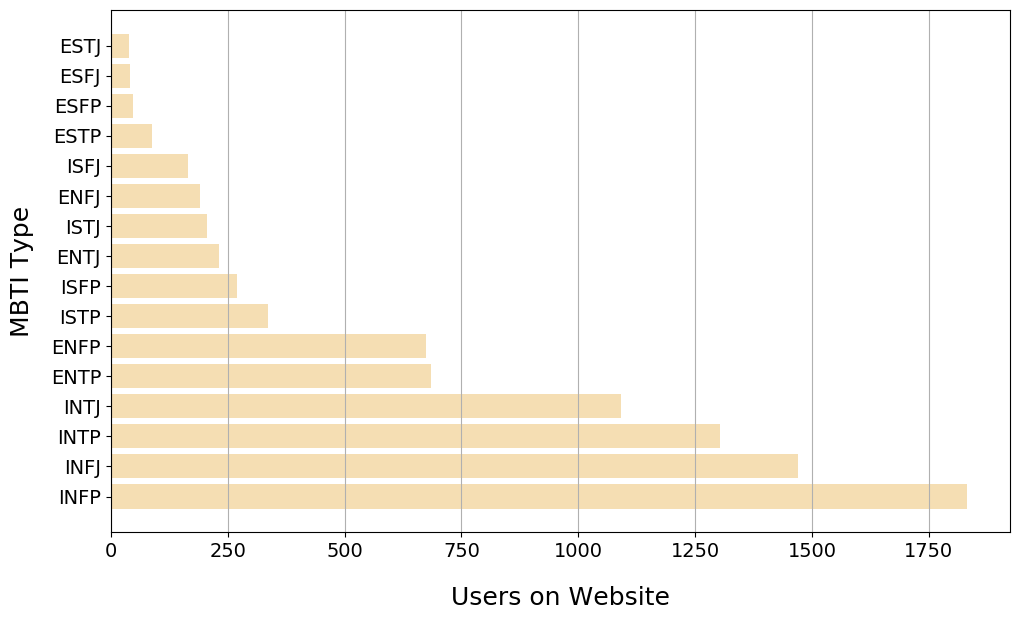

In [79]:
hist_data = list(type_count['posts'])
hist_label = list(type_count['type'])
ei_colors = ['red', 'blue']
ei_legend = ['Introvert', 'Extrovert']
color_by_ei = [ei_colors[hist_label[i][:1]=="E"] for i in range(len(hist_label))]
y = np.arange(len(hist_data))

width = 0.8

fig, ax = plt.subplots(figsize = (10,6))
ax.barh(y, hist_data, width, color = ['wheat'], align = 'center')
# ax.barh(y, hist_data, width, color = color_by_ei, align = 'center')
# ax.legend(ei_legend)

ax.set_yticks(y)
ax.set_yticklabels(hist_label, size=14)
# ax.set_xticklabels(size=16)
ax.xaxis.grid(True)
ax.set_ylabel('MBTI Type', size=18, labelpad=12)
ax.set_xlabel('Users on Website', size=18, labelpad=18)
fig.tight_layout(pad=0)

plt.show()

# *'*'*'*'* Issue with Legend *'*'*'*'*

In [36]:
asdf = ['ewtr', 'rtyr', 'uyio']
erty = ['rtyu', 'qwe', 'vbm']
gfhj = []
vbcn = asdf + erty + gfhj
vbcn

['ewtr', 'rtyr', 'uyio', 'rtyu', 'qwe', 'vbm']

In [39]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
txt_raw = df_raw['posts'][0]
txt_raw

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [43]:
link_count = txt_raw.count('http://')
link_count

21

In [21]:
def lowercase_text(text):
    return text.lower()

In [25]:
txt_rw_lw = lowercase_text(raw_text)
txt_rw_lw

"'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.|||may the perc experience immerse you.|||the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206|||hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [31]:
def split_text_by_delim(text, delim=' '):
    return text.split(delim)

In [35]:
txt_posts = split_text_by_delim(txt_rw_lw, '|||')
len(txt_posts)

50

In [36]:
txt_posts

["'http://www.youtube.com/watch?v=qsxhcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks',
 'what has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.',
 'may the perc experience immerse you.',
 'the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206',
 "hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

# count of char by post

In [100]:
def post_tot_word_char_count(text_list):
    '''
    Counts number of words and characters in a list of text lines 
    
    Parameters: 
    text_list (str): list of text strings 
  
    Returns: 
    words: list of word count by source list item
    chars: list of character count by source list item
    '''
    words = []
    chars = []
    for post in range(len(text_list)):
        words.append(len(txt_posts[post].split(" ")))
        chars.append(len(txt_posts[post]))
    return zip(words, chars)

In [ ]:
user1 = post_word_char_count(txt_posts)
list(user1)

In [104]:
def post_unique_word_count(text_list):
    post_tot_word_char_count(text_list):
    '''
    Counts number of unique words in a list of text lines 
    
    Parameters: 
    text_list (str): list of text strings 
  
    Returns: 
    words: list of word count by source list item
    '''
    pass

In [ ]:
def user_char_count():

In [46]:
sample = txt_posts[7]
print(sample)
"http://v" in sample

hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...


False

# Flag for links

In [55]:
link_flag = []
[link_flag.append('http' in txt_posts[i]) for i in range(len(txt_posts))]
link_flag

[True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False]

In [59]:
def post_contains_links(text):
    link_flag = []
    all_flags = [link_flag.append('http' in text[i]) for i in range(len(text))]
    return all_flags

post_link_flag = post_contains_links(txt_posts)
post_link_flag

SyntaxError: invalid syntax (<ipython-input-59-2932f92f40f1>, line 3)

In [67]:
def remove_punctuation(text, punctuation=punctuation):
    post_list = []
    for a in range(len(text)):
        return post_list.append(''.join([c for c in text if c not in punctuation]))
    

txt_rw_lw_np = remove_punctuation(txt_posts, punctuation=punctuation)
print(txt_rw_lw_np)
txt_posts



None


["'http://www.youtube.com/watch?v=qsxhcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks',
 'what has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.',
 'may the perc experience immerse you.',
 'the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206',
 "hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [ ]:
def remove_newline(text):
    return text.replace('\n', '')

In [ ]:
def remove_stopwords(word_lst, stopwords_set):
    return [word for word in word_lst if word not in stopwords_set]

In [ ]:
def replace_names(word_lst, name_set, replacement_val):
    word_lst_with_replacement = [] 
    for word in word_lst:
        if word in name_set:
            val = replacement_val
        else:
            val = word
        word_lst_with_replacement.append(val)
    return word_lst_with_replacement

In [ ]:
def create_cleaned_textline_from_words(words):
    text = ' '.join([word for word in words])
    return text

In [ ]:
def line_cleaning_pipeline(text, stopwords_set, name_set, replace_val):
    text_lc = lowercase_text(text)
    text_np = remove_punctuation(text_lc)
    text_nnl = remove_newline(text_np)
    words = split_text_into_words(text_nnl)
    words_nsw = remove_stopwords(words, stopwords_set)
    words_cleaned = replace_names(words_nsw, name_set, replace_val) 
    line_of_text_cleaned = create_cleaned_textline_from_words(words_cleaned)
    return line_of_text_cleaned

# Mean & SD of length of post (char) by MB type

In [2]:
df_raw = pd.read_csv('../data/mbti_1.csv')
df_raw.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
def remove_first_last_quote(dataframe, col):
    dataframe[col] = dataframe[col].str[1:-1]
    return dataframe
    
df_raw_no_quote = remove_first_last_quote(df_raw, 'posts')
df_raw_no_quote.posts[0]

"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

In [4]:
df2 = df_raw_no_quote #[0:10]
df2

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...
...,...,...
8670,ISFP,https://www.youtube.com/watch?v=t8edHB_h908|||...
8671,ENFP,So...if this thread already exists someplace e...
8672,INTP,So many questions when i do these things. I w...
8673,INFP,I am very conflicted right now when it comes t...


In [5]:
df2.posts = df2.posts.str.split('\|\|\|')
df2.head(10)

,type,posts
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h..."
1,ENTP,[I'm finding the lack of me in these posts ver...
2,INTP,[Good one _____ https://www.youtube.com/wat...
3,INTJ,"[Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,"[You're fired., That's another silly misconcep..."
5,INTJ,"[18/37 @.@, Science is not perfect. No scient..."
6,INFJ,"[No, I can't draw on my own nails (haha). Thos..."
7,INTJ,[I tend to build up a collection of things on ...
8,INFJ,"['m not sure, that's a good question. The dist..."
9,INTP,"[https://www.youtube.com/watch?v=w8-egj0y8Qs, ..."


In [37]:
len(df_raw.index)

8675

In [38]:
df2['posts_char_count'] = ""
df2

/home/asa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,posts,posts_char_count
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",
1,ENTP,[I'm finding the lack of me in these posts ver...,


In [55]:
df2.drop('posts_char_count', axis=1)

,type,posts
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h..."
1,ENTP,[I'm finding the lack of me in these posts ver...


In [6]:
def create_post_length_list(dataframe, col, newcol):
    dataframe[newcol] = ""
    for i in range(len(dataframe.index)):
        char_count_list = []
        for post in range(len(dataframe[col][i])):
            char_count_list.append(len(dataframe[col][i][post]))
        dataframe[newcol][i] = char_count_list
    return dataframe

df3 = create_post_length_list(df2, 'posts', 'posts_char_count')
df3.head(10)

,type,posts,posts_char_count
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...","[42, 61, 151, 61, 117, 36, 135, 200, 171, 18, ..."
1,ENTP,[I'm finding the lack of me in these posts ver...,"[56, 196, 36, 191, 49, 198, 201, 67, 49, 191, ..."
2,INTP,[Good one _____ https://www.youtube.com/wat...,"[61, 66, 197, 35, 201, 200, 34, 56, 77, 146, 1..."
3,INTJ,"[Dear INTP, I enjoyed our conversation the o...","[188, 52, 83, 93, 50, 201, 200, 196, 122, 41, ..."
4,ENTJ,"[You're fired., That's another silly misconcep...","[13, 190, 170, 42, 195, 60, 98, 202, 66, 90, 1..."
5,INTJ,"[18/37 @.@, Science is not perfect. No scient...","[9, 195, 57, 198, 34, 201, 197, 197, 198, 199,..."
6,INFJ,"[No, I can't draw on my own nails (haha). Thos...","[191, 197, 81, 156, 126, 199, 200, 199, 197, 1..."
7,INTJ,[I tend to build up a collection of things on ...,"[179, 190, 197, 194, 6, 110, 93, 5, 73, 193, 2..."
8,INFJ,"['m not sure, that's a good question. The dist...","[195, 193, 43, 43, 199, 164, 201, 101, 201, 43..."
9,INTP,"[https://www.youtube.com/watch?v=w8-egj0y8Qs, ...","[43, 195, 88, 197, 42, 198, 141, 119, 145, 197..."


In [7]:
df_words_by_type = df2.groupby('type').agg({'posts_char_count': 'sum'})
df_words_by_type

,posts_char_count
type,
ENFJ,"[43, 5, 202, 23, 198, 156, 10, 15, 201, 198, 8..."
ENFP,"[199, 202, 201, 196, 200, 193, 66, 201, 71, 20..."
ENTJ,"[13, 190, 170, 42, 195, 60, 98, 202, 66, 90, 1..."
ENTP,"[56, 196, 36, 191, 49, 198, 201, 67, 49, 191, ..."
ESFJ,"[8, 139, 200, 121, 173, 47, 200, 182, 196, 201..."
ESFP,"[38, 157, 198, 87, 31, 30, 202, 194, 161, 122,..."
ESTJ,"[23, 116, 29, 197, 2, 197, 200, 152, 200, 199,..."
ESTP,"[36, 112, 195, 28, 35, 12, 2, 41, 75, 83, 33, ..."
INFJ,"[42, 61, 151, 61, 117, 36, 135, 200, 171, 18, ..."


In [211]:
max_post_len = []
for a in range(0,16):
    max_post_len.append(max(df_words_by_type['posts_char_count'][a]))
                        
max_post_len

[230,
 211,
 253,
 210,
 203,
 203,
 204,
 204,
 263,
 216,
 211,
 214,
 206,
 206,
 204,
 207]

In [8]:
types = {'ISTJ': (0,0),
         'ISFJ': (0,1),
         'INFJ': (0,2),
         'INTJ': (0,3),
         'ISTP': (1,0),
         'ISFP': (1,1),
         'INFP': (1,2),
         'INTP': (1,3),
         'ESTP': (2,0),
         'ESFP': (2,1),
         'ENFP': (2,2),
         'ENTP': (2,3),
         'ESTJ': (3,0),
         'ESFJ': (3,1),
         'ENFJ': (3,2),
         'ENTJ': (3,3)
        }

print(types[list(types.keys())[4]])
print(list(types.keys())[4])

(1, 0)
ISTP


In [203]:
range(len(list(types.keys())))

range(0, 16)

In [35]:

plt.rcParams.update(plt.rcParamsDefault)

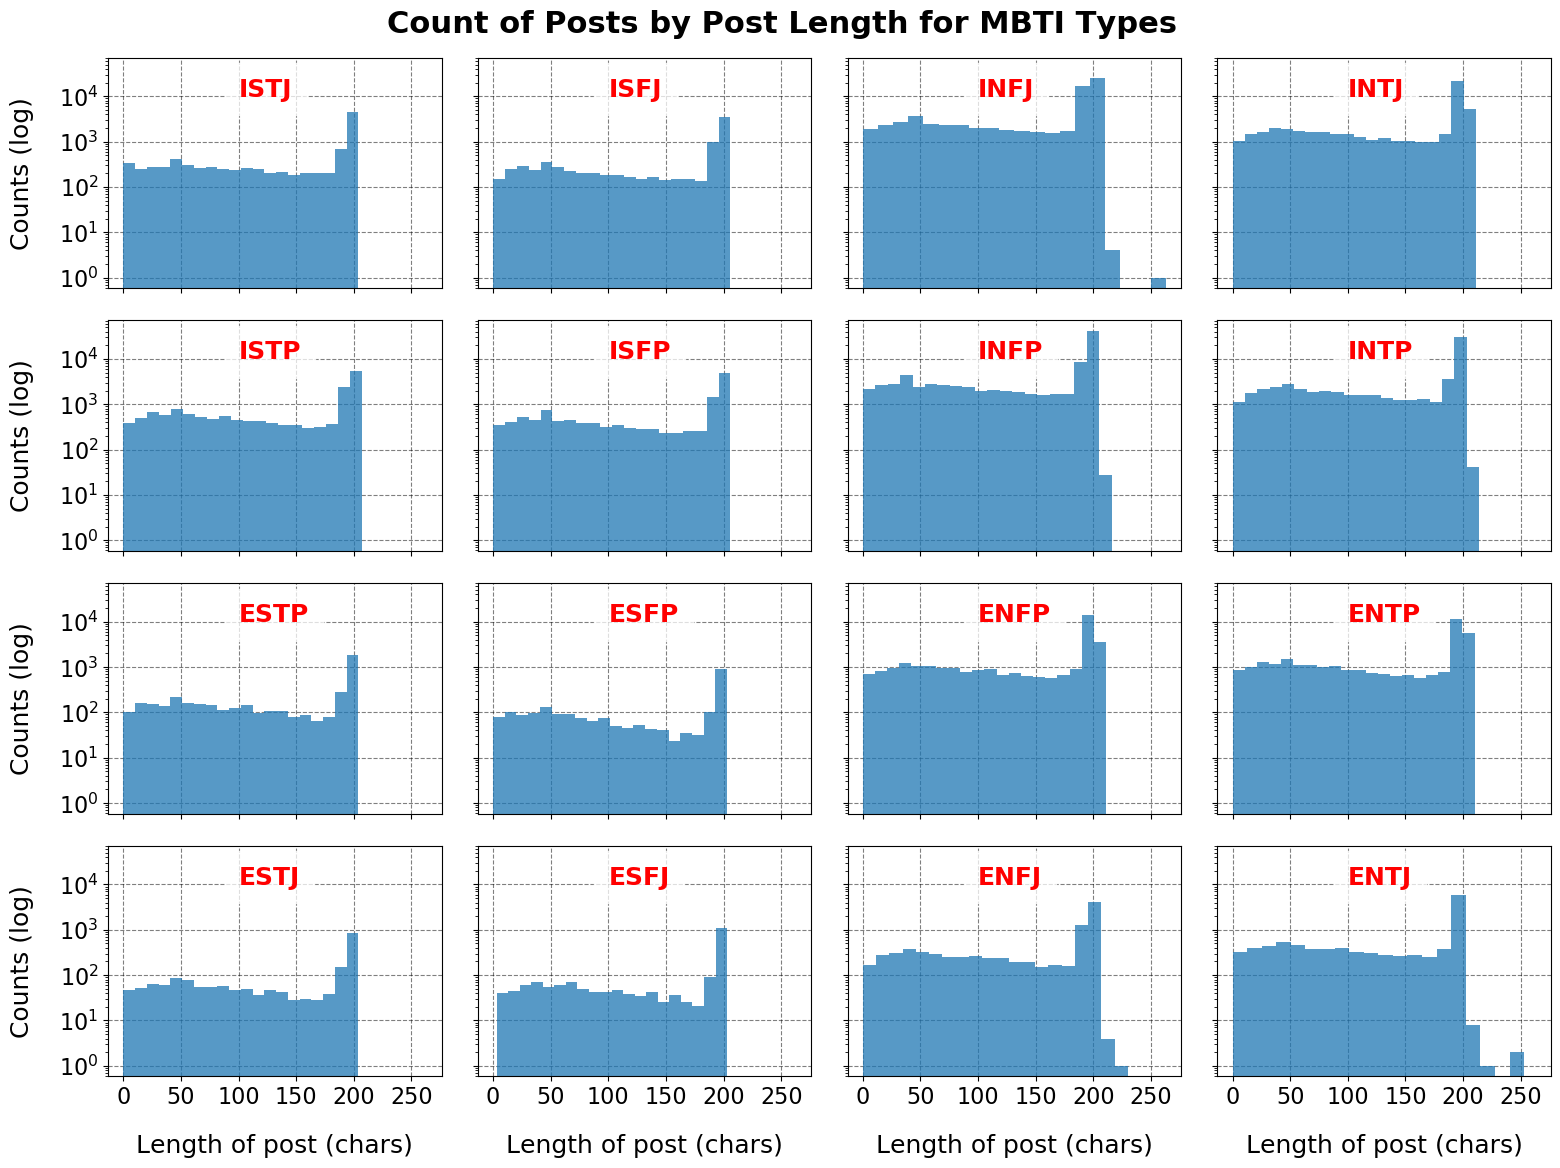

In [70]:
fig, axs = plt.subplots(4, 4, figsize=(16, 12), sharex=True, sharey=True)

for i in range(len(list(types.keys()))):
    ax = axs[types[list(types.keys())[i]]]
    ax.grid(True, color='black', alpha=0.5, linestyle='dashed')
    ax.hist(df_words_by_type.loc[list(types.keys())[i],:], bins=20, alpha = 0.75)
    ax.set_xlabel('Length of post (chars)', fontsize=18, labelpad=18)
    ax.set_ylabel('Counts (log)', fontsize=18, labelpad=18)
    ax.set_axisbelow(True)
    ax.text(100, 10000, list(types.keys())[i], fontsize = 18, fontweight='bold', color = 'red',
        bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 0.75, 'pad': 10})
    xvalues = np.arange(0, 251, 50)
    plt.xticks(xvalues)
    ax.set_xticklabels(xvalues, fontsize=16)
    yvalues = np.arange(0, 40001, 10000)
    plt.yticks(yvalues)
    ax.set_yticklabels(yvalues, fontsize=16)
    ax.label_outer()

plt.yscale("log")
fig.suptitle('Count of Posts by Post Length for MBTI Types', fontsize=22, fontweight='bold', y = 0.98)
fig.tight_layout(pad = 2)
plt.subplots_adjust(top=0.94)
plt.show()
fig.savefig("../images/post_length_hist_by_type.png")

In [150]:
df3 = df2.explode('posts_char_count')
df3['posts_char_count'] = df3['posts_char_count'].astype(int)
df3

,type,posts,posts_char_count
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",42
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",61
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",151
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",61
0,INFJ,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",117
...,...,...,...
9,INTP,"[https://www.youtube.com/watch?v=w8-egj0y8Qs, ...",194
9,INTP,"[https://www.youtube.com/watch?v=w8-egj0y8Qs, ...",60
9,INTP,"[https://www.youtube.com/watch?v=w8-egj0y8Qs, ...",194
9,INTP,"[https://www.youtube.com/watch?v=w8-egj0y8Qs, ...",129


In [151]:
df3.groupby('type').mean()

,posts_char_count
type,
ENTJ,119.240000
ENTP,138.080000
INFJ,116.306667
INTJ,142.086667
INTP,125.400000


In [154]:
df3.groupby('type').std()

,posts_char_count
type,
ENTJ,73.662097
ENTP,63.930715
INFJ,67.812508
INTJ,67.731303
INTP,70.988120


In [148]:
len(df_words_by_type['posts_char_count'][0])

50

In [112]:
ls = df_words_by_type['posts_char_count'][0]
mean = sum(ls) / len(ls)
mean2 = np.mean(ls)
mean2

119.24

In [ ]:
s = np.mean(df_words_by_type['posts_char_count'].tolist(), axis=1)
s

In [118]:
s = pd.DataFrame(df_words_by_type['posts_char_count'].values.tolist()).mean(1)
s

0    119.240000
1    138.080000
2    116.306667
3    142.086667
4    125.400000
dtype: float64

In [133]:
df_words_by_type['Mean'] = pd.DataFrame(df_words_by_type['posts_char_count'].values.tolist()).mean(1)
df_words_by_type

,posts_char_count,Mean
type,,
ENTJ,"[13, 190, 170, 42, 195, 60, 98, 202, 66, 90, 1...",NaN
ENTP,"[56, 196, 36, 191, 49, 198, 201, 67, 49, 191, ...",NaN
INFJ,"[42, 61, 151, 61, 117, 36, 135, 200, 171, 18, ...",NaN
INTJ,"[188, 52, 83, 93, 50, 201, 200, 196, 122, 41, ...",NaN
INTP,"[61, 66, 197, 35, 201, 200, 34, 56, 77, 146, 1...",NaN


In [95]:
type(df_words_by_type['posts_char_count'][0][0])

int

In [14]:
def split_text_by_delim(text, delim=' '):
    return text.split(delim)


In [ ]:
def remove_extra_quotes():

In [19]:
txt_raw[-1]

"'"